In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-68.20224621809723, 145.31012259998994),
 (-33.314809311190565, 1.400779464002909),
 (51.166643293966246, -81.3959451241923),
 (-31.754485255608373, 45.263448792394485),
 (4.029283651432792, -8.966779377978469),
 (-60.375048658512064, -58.21332636583607),
 (-17.260439480111685, 44.06500105363358),
 (-14.795956462347505, -123.65336231443453),
 (26.571942838588754, -166.48142232704657),
 (-28.846153145463816, 88.88463127057861),
 (87.96957682297091, -103.34148530624702),
 (-80.41871751213249, 20.69724033835385),
 (57.98888478071274, -34.633739216672694),
 (83.04176293177346, 145.09982082406498),
 (81.44701594293912, 162.95564034619218),
 (72.36728655457787, 48.07276120556696),
 (-75.39727203356921, -32.153933725996865),
 (-71.09391891471088, 164.91824506695417),
 (24.33813648730103, -175.61097329807237),
 (88.20592290452862, 153.76340205186807),
 (0.4748085192827176, 145.97963398781746),
 (61.523868202054274, -143.15228549207407),
 (-10.003754322377205, 130.5035620108829),
 (75.9641077

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [6]:
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=36766262a3dc3e451574e8e0227efe11


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | moose factory
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | harper
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tsiroanomandidy
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | fairbanks
Processing Record 20 of Set 1 | nguiu
City not found. Skipping...
Processing Record 21 of Set 1 | ya

Processing Record 38 of Set 4 | troitskiy
Processing Record 39 of Set 4 | pandamatenga
Processing Record 40 of Set 4 | koundara
Processing Record 41 of Set 4 | santa rosa
Processing Record 42 of Set 4 | san jose
Processing Record 43 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 4 | niamey
Processing Record 45 of Set 4 | agara
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | cape town
Processing Record 48 of Set 4 | yulara
Processing Record 49 of Set 4 | kencong
Processing Record 50 of Set 4 | kloulklubed
Processing Record 1 of Set 5 | port macquarie
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | bonthe
Processing Record 4 of Set 5 | saskylakh
Processing Record 5 of Set 5 | bahia honda
Processing Record 6 of Set 5 | naenwa
City not found. Skipping...
Processing Record 7 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Record 8 of Set 5 | acapulco
Processing Record 9 of Set 5 | gorontalo
Processing Reco

City not found. Skipping...
Processing Record 27 of Set 8 | meulaboh
Processing Record 28 of Set 8 | carutapera
Processing Record 29 of Set 8 | gushikawa
Processing Record 30 of Set 8 | boyolangu
Processing Record 31 of Set 8 | polson
Processing Record 32 of Set 8 | general roca
Processing Record 33 of Set 8 | luanda
Processing Record 34 of Set 8 | samusu
City not found. Skipping...
Processing Record 35 of Set 8 | halalo
City not found. Skipping...
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | charters towers
Processing Record 38 of Set 8 | san juan
Processing Record 39 of Set 8 | saint-joseph
Processing Record 40 of Set 8 | tabou
Processing Record 41 of Set 8 | muisne
Processing Record 42 of Set 8 | kunnamangalam
Processing Record 43 of Set 8 | fatsa
Processing Record 44 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 45 of Set 8 | polyarnyy
Processing Record 46 of Set 8 | cap malheureux
Processing Record 47 of Set 8 | kytlym
City not found. 

Processing Record 12 of Set 12 | praia
Processing Record 13 of Set 12 | hermiston
Processing Record 14 of Set 12 | vao
Processing Record 15 of Set 12 | rungata
City not found. Skipping...
Processing Record 16 of Set 12 | morehead
Processing Record 17 of Set 12 | opuwo
Processing Record 18 of Set 12 | san-pedro
Processing Record 19 of Set 12 | aksu
Processing Record 20 of Set 12 | bolshaya murta
City not found. Skipping...
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | aanekoski
Processing Record 23 of Set 12 | wladyslawowo
Processing Record 24 of Set 12 | siparia
Processing Record 25 of Set 12 | safwah
City not found. Skipping...
Processing Record 26 of Set 12 | denton
Processing Record 27 of Set 12 | along
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,39.20,93,0,6.93,AU,2020-07-09 16:12:21
1,Luderitz,-26.65,15.16,62.60,67,96,13.87,NA,2020-07-09 16:15:43
2,Moose Factory,51.26,-80.61,80.60,61,1,5.82,CA,2020-07-09 16:15:43
3,Harper,4.38,-7.72,78.04,81,96,11.97,LR,2020-07-09 16:15:43
4,Ushuaia,-54.80,-68.30,35.60,74,40,3.36,AR,2020-07-09 16:12:46
5,Tsiroanomandidy,-18.77,46.03,65.44,46,3,6.91,MG,2020-07-09 16:15:44
6,Rikitea,-23.12,-134.97,68.07,62,4,16.35,PF,2020-07-09 16:15:44
7,Kapaa,22.08,-159.32,77.00,83,75,13.87,US,2020-07-09 16:15:44
8,Carnarvon,-24.87,113.63,59.00,44,100,10.29,AU,2020-07-09 16:15:44
9,Yellowknife,62.46,-114.35,60.80,63,75,3.36,CA,2020-07-09 16:11:38


In [12]:
# Rearrange Columns
newColumnOrder = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[newColumnOrder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-07-09 16:12:21,-42.88,147.33,39.20,93,0,6.93
1,Luderitz,NA,2020-07-09 16:15:43,-26.65,15.16,62.60,67,96,13.87
2,Moose Factory,CA,2020-07-09 16:15:43,51.26,-80.61,80.60,61,1,5.82
3,Harper,LR,2020-07-09 16:15:43,4.38,-7.72,78.04,81,96,11.97
4,Ushuaia,AR,2020-07-09 16:12:46,-54.80,-68.30,35.60,74,40,3.36
5,Tsiroanomandidy,MG,2020-07-09 16:15:44,-18.77,46.03,65.44,46,3,6.91
6,Rikitea,PF,2020-07-09 16:15:44,-23.12,-134.97,68.07,62,4,16.35
7,Kapaa,US,2020-07-09 16:15:44,22.08,-159.32,77.00,83,75,13.87
8,Carnarvon,AU,2020-07-09 16:15:44,-24.87,113.63,59.00,44,100,10.29
9,Yellowknife,CA,2020-07-09 16:11:38,62.46,-114.35,60.80,63,75,3.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594312985.074208

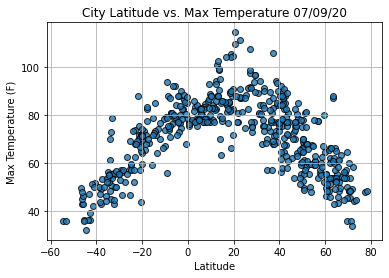

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


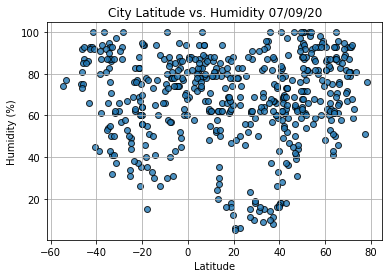

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

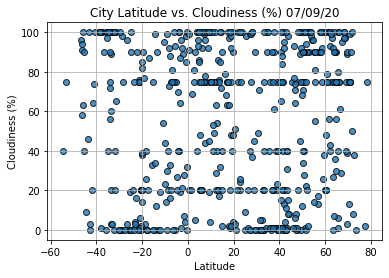

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

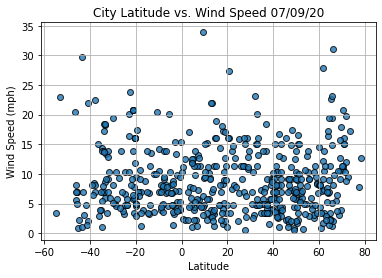

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

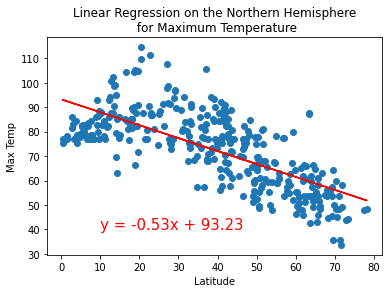

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

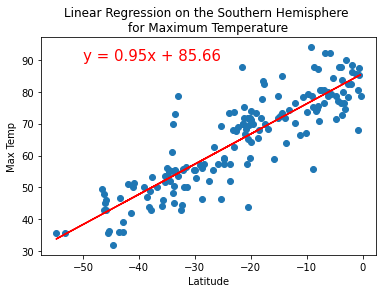

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

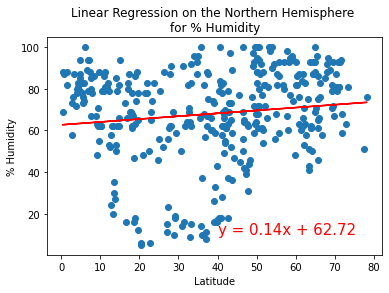

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

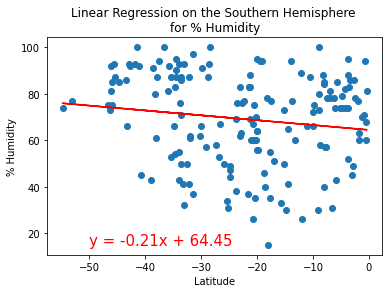

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

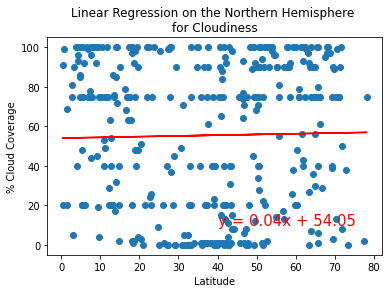

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', '% Cloud Coverage',(40,10))

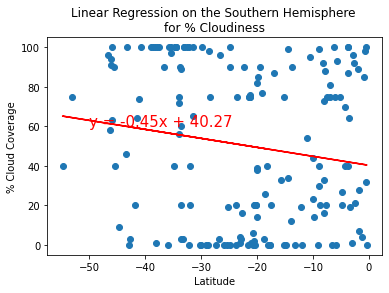

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloud Coverage',(-50,60))

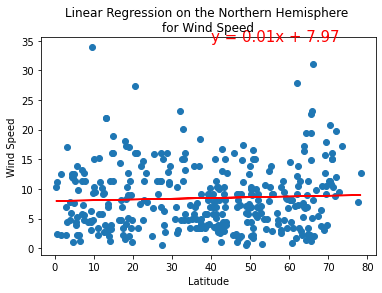

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

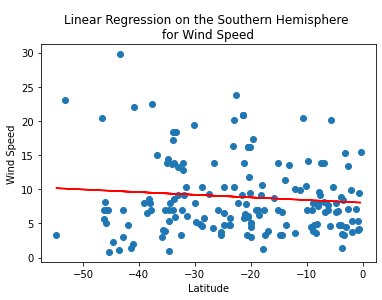

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

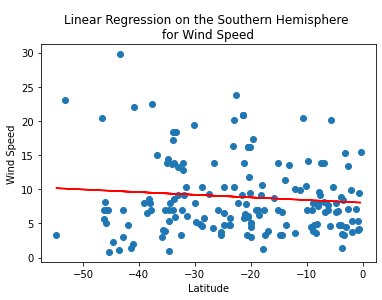

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))